In [1]:
import pandas as pd
from data_transform import DataTransform
from dataframe_transform import DataFrameTransform
from dataframeinfo import DataFrameInfo
from plotter import Plotter
import pandas as pd
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [3]:
# Load Data
df = pd.read_csv("loan_payments.csv")
# Cast Datatypes
data_transformer = DataTransform()
df = data_transformer.encode_transform(df)
df = data_transformer.cast_column_dtypes(df)
df_info = DataFrameInfo(df)

id --> int32
member_id --> int32
loan_amount --> int32
funded_amount --> float32
funded_amount_inv --> float32
term --> int32
int_rate --> float32
instalment --> float32
grade --> category
sub_grade --> category
employment_length --> int32
home_ownership --> category
annual_inc --> float32
verification_status --> category
issue_date --> date
loan_status --> category
payment_plan --> category
purpose --> category
dti --> float32
delinq_2yrs --> int32
earliest_credit_line --> date
inq_last_6mths --> int32
mths_since_last_delinq --> int32
mths_since_last_record --> int32
open_accounts --> int32
total_accounts --> int32
out_prncp --> float32
out_prncp_inv --> float32
total_payment --> float32
total_payment_inv --> float32
total_rec_prncp --> float32
total_rec_int --> float32
total_rec_late_fee --> float32
recoveries --> float32
collection_recovery_fee --> float32
last_payment_date --> date
last_payment_amount --> float32
next_payment_date --> date
last_credit_pull_date --> date
collections

In [4]:
df_info.get_null_counts()

,number of nulls,percentage of nulls,percentage of non-nulls
Unnamed: 0,0,0.00,100.00
id,0,0.00,100.00
member_id,0,0.00,100.00
loan_amount,0,0.00,100.00
funded_amount,3007,5.54,94.46
funded_amount_inv,0,0.00,100.00
term,4772,8.80,91.20
int_rate,5169,9.53,90.47
instalment,0,0.00,100.00
employment_length,2118,3.91,96.09


In [5]:
columns_with_nulls = df_info.get_only_columns_with_nulls()
columns_with_nulls

,number of nulls,percentage of nulls,percentage of non-nulls
funded_amount,3007,5.54,94.46
term,4772,8.80,91.20
int_rate,5169,9.53,90.47
employment_length,2118,3.91,96.09
mths_since_last_delinq,31002,57.17,42.83
mths_since_last_record,48050,88.60,11.40
last_payment_date,73,0.13,99.87
next_payment_date,32608,60.13,39.87
last_credit_pull_date,7,0.01,99.99
collections_12_mths_ex_med,51,0.09,99.91


<Figure size 640x480 with 0 Axes>

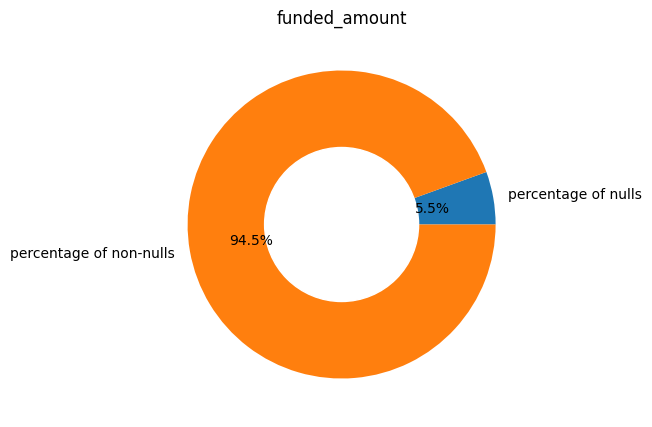

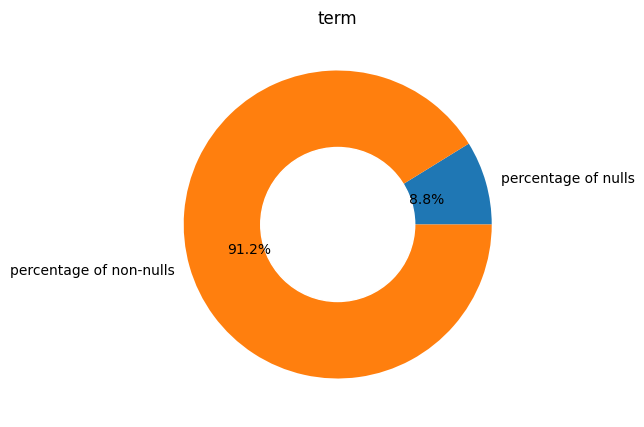

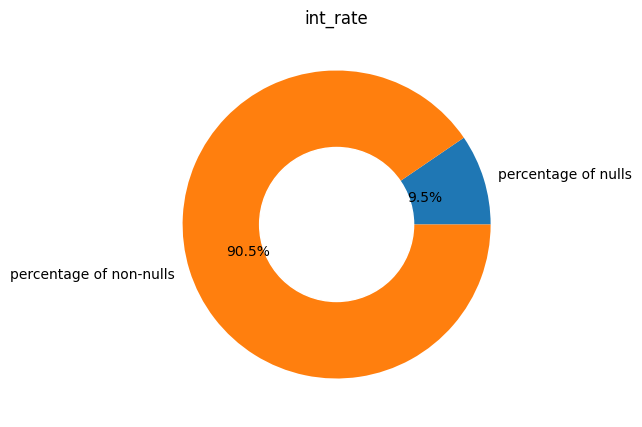

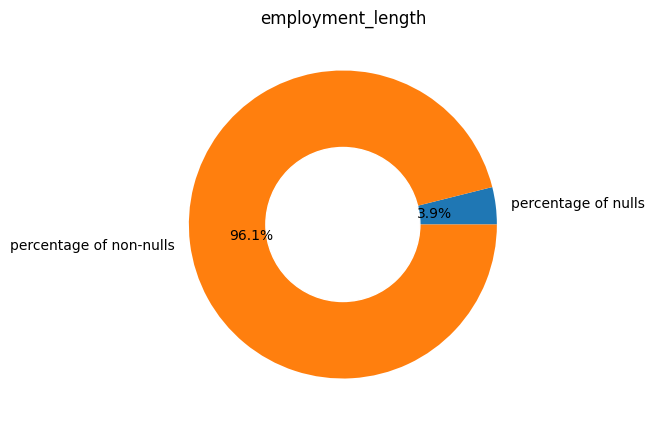

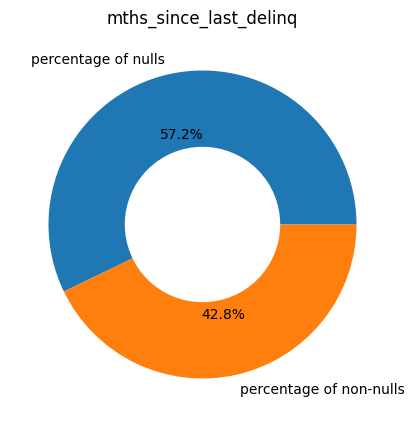

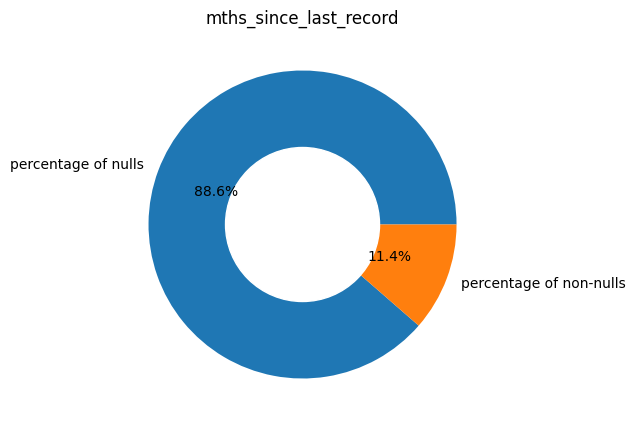

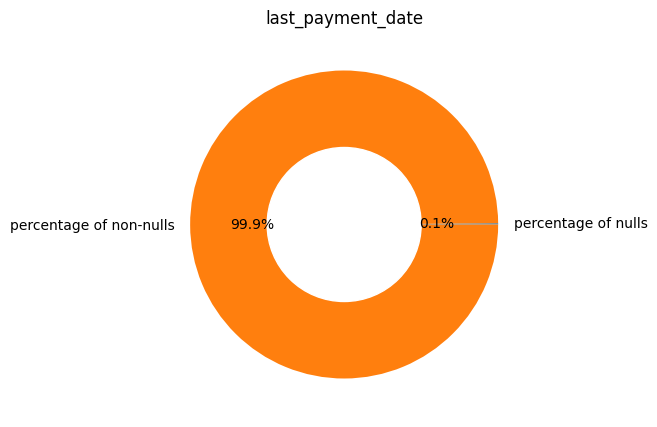

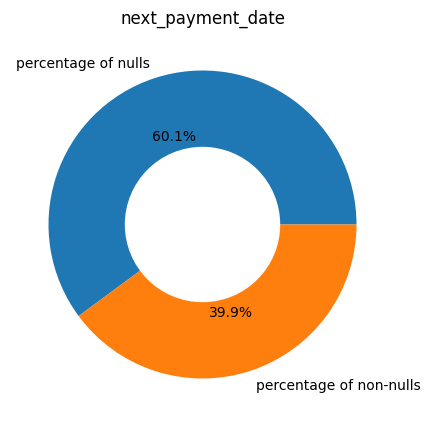

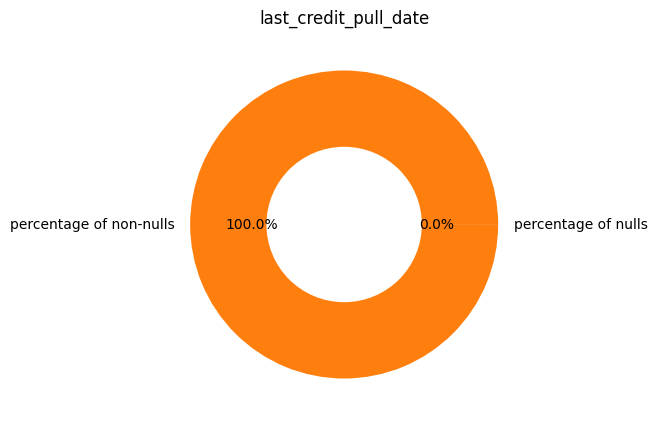

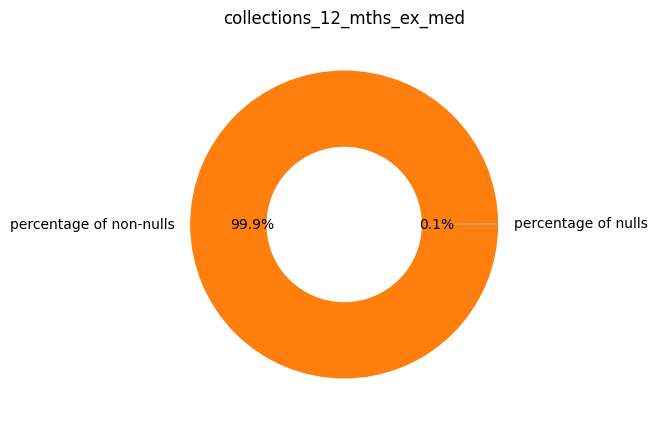

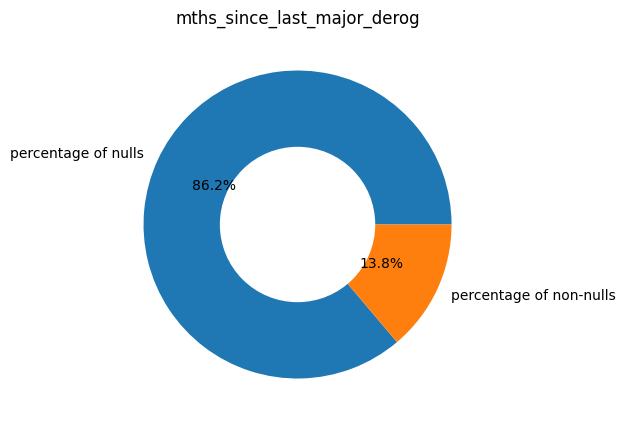

In [6]:
plotter = Plotter()
plotter.plot_null_percentages(columns_with_nulls)

1. funded_amount
    - Impute
    - 5.54% is a minor amount

2. term
    - explore correlation with loan_status
    - 8.8% might be too much to impute or drop rows, but not so much to drop the whole column.
    - key information for loan analysis

3. Employment_length:
    - Impute
    - 3.9% minor amount
4. int_rate 
    - Impute or find correlation
5. mths_since_last_delinq
    - Drop column
    - 57% null values is a major data loss
6. mths_since_last_record
    - Drop column
    - 89% null values is a major data loss
7. last_payment_date
    - Impute 
    - 0.1% very minor
8. next_payment_date
    - Find correlation
    - 39.9% is major
9. last_credit_pull_date
    - Impute
    - 0.001% is very minor
10. collections_12_mths_ex_med
    - Impute 
    - 0.9% is very minor 
11. mths_since_last_major_derog	
    - Drop column 
    - 86% is a majot data loss

In [6]:
# Imputer
dataframe_transformer = DataFrameTransform()

# funded_amount

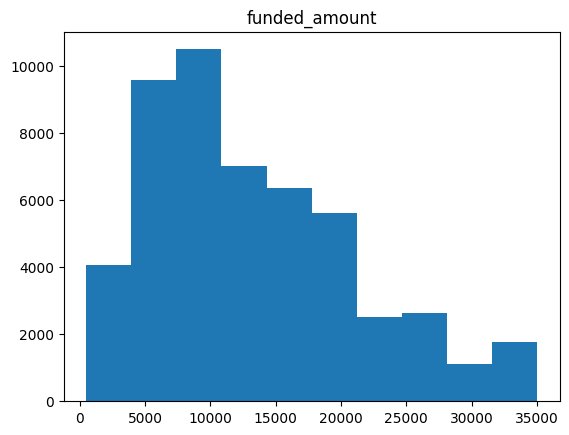

       funded_amount
0             8000.0
1            13200.0
2            16000.0
3            15000.0
4            15000.0
...              ...
54226         5000.0
54227         5000.0
54228         3500.0
54229         5000.0
54230         5000.0

[54231 rows x 1 columns]


In [7]:
# What do we impute funded_amount with?
# First get the distribution 
plotter.plot_histogram(df['funded_amount'],'funded_amount')
print(df[['funded_amount']])

In [8]:
# D’Agostino’s K^2 Test for testing normal distribution
stat, p = normaltest(df['funded_amount'], nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=4491.437, p=0.000


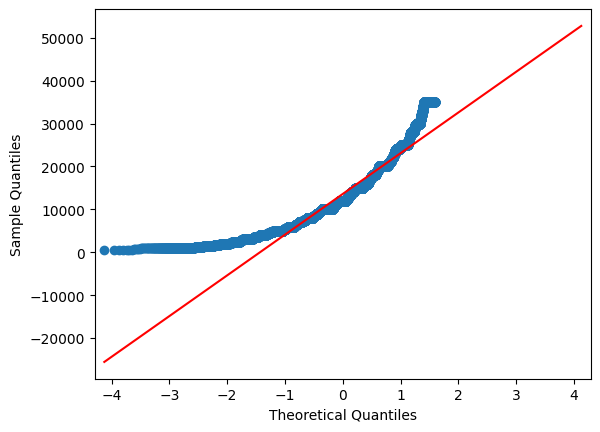

In [9]:
# Plot qqplot
plotter.plot_qq(df['funded_amount'])

# funded_amount:
### Decision: 
    Impute with median
### Why: 
    Histogram and QQ plots show an overall normal distribtion. 
    Normal test shows the p-value as < 0.005, therefore is not statistically significant, 
    and therefore the null hypothesis should be rejected.

In [10]:
# What is the median?
print(f'The median of HouseAge is {df["funded_amount"].median()}')

The median of HouseAge is 12000.0


In [11]:
# Impute funded_amount with median 
df['funded_amount'] = df['funded_amount'].fillna(df['funded_amount'].median())

In [12]:
# Impute funded_amount with median (using class method)
df = dataframe_transformer.average_imputer(df,'funded_amount','median')

In [13]:
df_info = DataFrameInfo(df)
df_info.get_null_counts().T['funded_amount']

number of nulls              0.0
percentage of nulls          0.0
percentage of non-nulls    100.0
Name: funded_amount, dtype: float64

In [14]:
df_info.get_only_columns_with_nulls()

,number of nulls,percentage of nulls,percentage of non-nulls
int_rate,5169,9.53,90.47
employment_length,2118,3.91,96.09
mths_since_last_delinq,31002,57.17,42.83
mths_since_last_record,48050,88.60,11.40
last_payment_date,73,0.13,99.87
next_payment_date,32608,60.13,39.87
last_credit_pull_date,7,0.01,99.99
collections_12_mths_ex_med,51,0.09,99.91
mths_since_last_major_derog,46732,86.17,13.83


# term

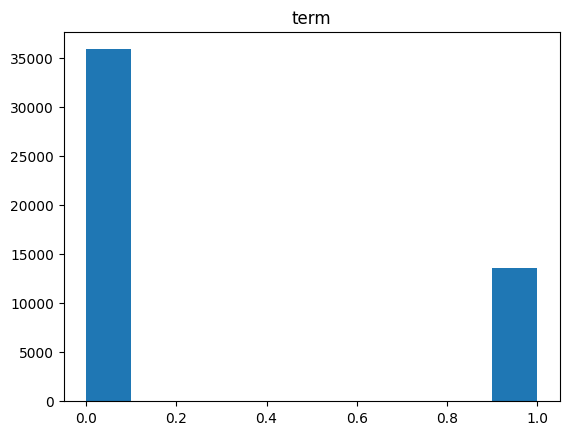

       term
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
...     ...
54226   0.0
54227   0.0
54228   0.0
54229   0.0
54230   0.0

[54231 rows x 1 columns]


In [7]:
# What do we impute funded_amount with?
# First get the distribution 
plotter.plot_histogram(df['term'],'term')
print(df[['term']])

# last_payment_date, last_credit_pull_date, collections_12_mths_ex_med

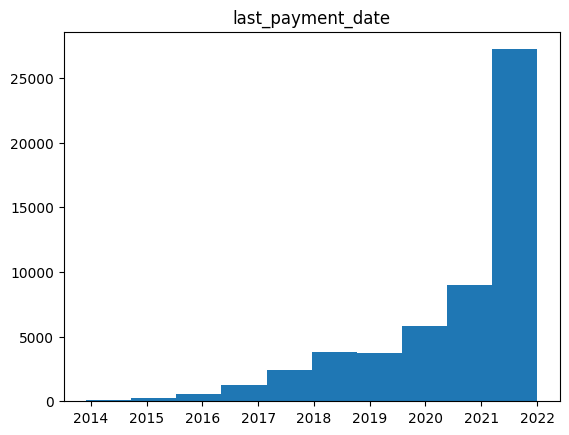

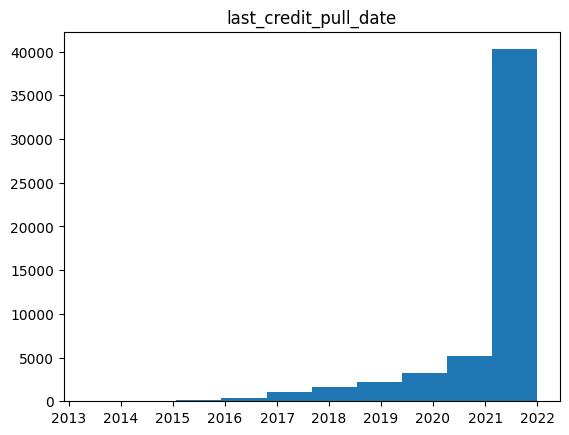

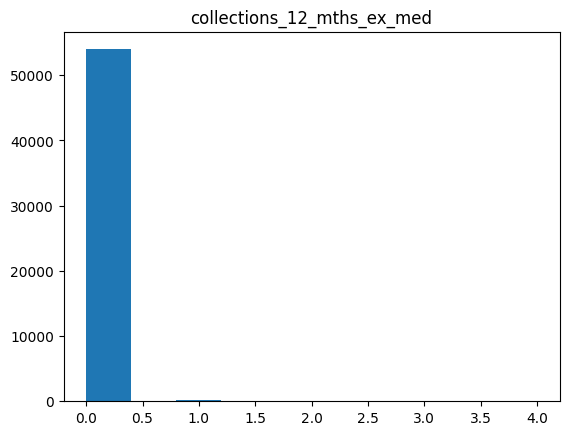

In [15]:
# First get the distribution 
list_of_columns = ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']
for column in list_of_columns:
    plotter.plot_histogram(df[column],column)

In [17]:
import matplotlib.dates as mpl_dates

In [18]:
# D’Agostino’s K^2 Test for testing normal distribution
for column in list_of_columns:
    stat, p = normaltest(df[column].apply(mpl_dates.date2num), nan_policy='omit')
    print(column)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

last_payment_date
Statistics=9407.733, p=0.000
last_credit_pull_date
Statistics=23402.823, p=0.000
collections_12_mths_ex_med
Statistics=118894.649, p=0.000


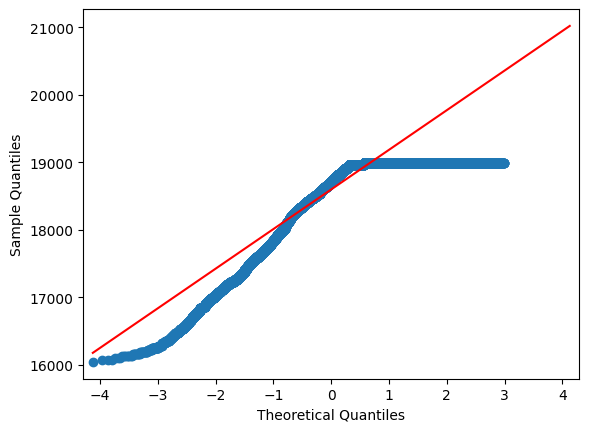

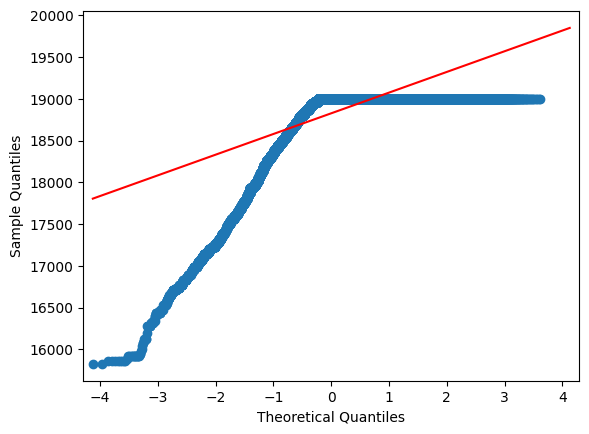

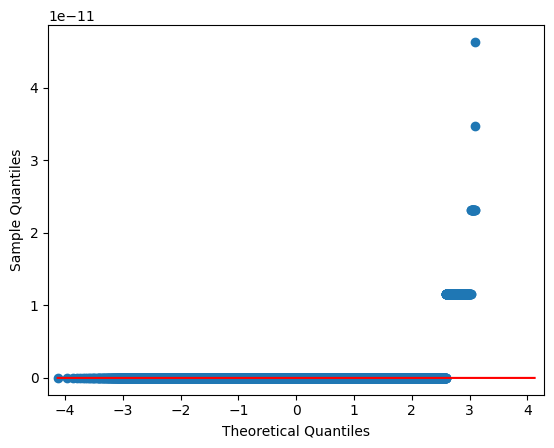

In [19]:
# Plot qqplot
for column in list_of_columns:
    plotter.plot_qq(df[column].apply(mpl_dates.date2num))

# last_payment_date, last_credit_pull_date, collections_12_mths_ex_med

### Decision:

#### last_payment_date, last_credit_pull_date
    Impute with median

#### collections_12_mths_ex_med
    Impute with mode
### Why:
    Very small number of missing values, but we don't want to lose data by dropping the rows 
    There are 131 rows which will be dropped if all the nulls in these columns are dropped.

In [20]:
# Implement imputations 
df['last_payment_date'] = df['last_payment_date'].fillna(df['last_payment_date'].median())
df['last_credit_pull_date'] = df['last_credit_pull_date'].fillna(df['last_credit_pull_date'].median())
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mode()[0])


In [21]:
# Implement using class method
df = dataframe_transformer.average_imputer(df,'last_payment_date','median')
df = dataframe_transformer.average_imputer(df,'last_credit_pull_date','median')
df = dataframe_transformer.average_imputer(df,'collections_12_mths_ex_med','mode')
    

In [22]:
df_info = DataFrameInfo(df)

In [23]:
for column in list_of_columns:
    df_info = DataFrameInfo(df)
    null_info = df_info.get_null_counts().T[column]
    print(null_info, '\n')

number of nulls              0.0
percentage of nulls          0.0
percentage of non-nulls    100.0
Name: last_payment_date, dtype: float64 

number of nulls              0.0
percentage of nulls          0.0
percentage of non-nulls    100.0
Name: last_credit_pull_date, dtype: float64 

number of nulls              0.0
percentage of nulls          0.0
percentage of non-nulls    100.0
Name: collections_12_mths_ex_med, dtype: float64 



In [24]:
df_info.get_only_columns_with_nulls()

,number of nulls,percentage of nulls,percentage of non-nulls
int_rate,5169,9.53,90.47
employment_length,2118,3.91,96.09
mths_since_last_delinq,31002,57.17,42.83
mths_since_last_record,48050,88.60,11.40
next_payment_date,32608,60.13,39.87
mths_since_last_major_derog,46732,86.17,13.83


# int_rate

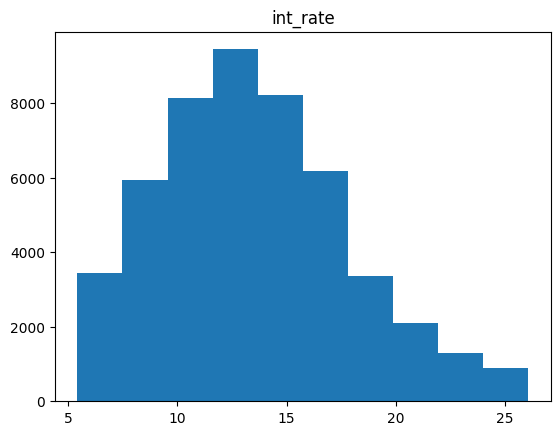

       int_rate
0          7.49
1          6.99
2          7.49
3         14.31
4          6.03
...         ...
54226      9.01
54227     10.59
54228      7.43
54229      7.43
54230     11.54

[54231 rows x 1 columns]


In [26]:
# First get the distribution 
plotter.plot_histogram(df['int_rate'],'int_rate')
print(df[['int_rate']])

In [27]:
# D’Agostino’s K^2 Test for testing normal distribution
stat, p = normaltest(df['int_rate'], nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1421.934, p=0.000


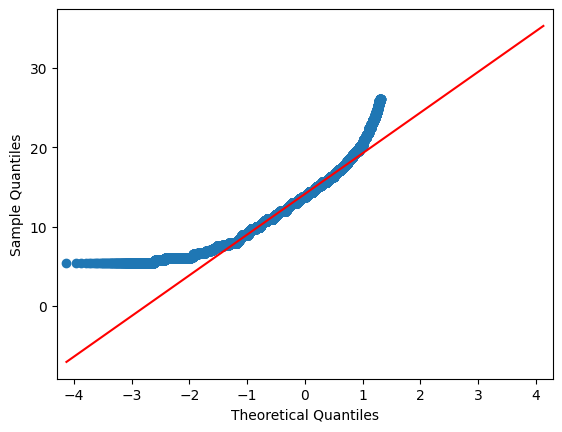

In [28]:
# Plot qqplot
plotter.plot_qq(df['int_rate'])

# int_rate

### Decision:
    Impute with mean

### Why:
    Shows normal distribution

In [29]:
# Implement imputations 
df = dataframe_transformer.average_imputer(df,'int_rate','mean')

In [30]:
df_info = DataFrameInfo(df)

In [31]:
df_info = DataFrameInfo(df)
null_info = df_info.get_null_counts().T['int_rate']
print(null_info, '\n')

number of nulls              0.0
percentage of nulls          0.0
percentage of non-nulls    100.0
Name: int_rate, dtype: float64 



In [32]:
df_info.get_only_columns_with_nulls()

,number of nulls,percentage of nulls,percentage of non-nulls
employment_length,2118,3.91,96.09
mths_since_last_delinq,31002,57.17,42.83
mths_since_last_record,48050,88.60,11.40
next_payment_date,32608,60.13,39.87
mths_since_last_major_derog,46732,86.17,13.83


# employment_length

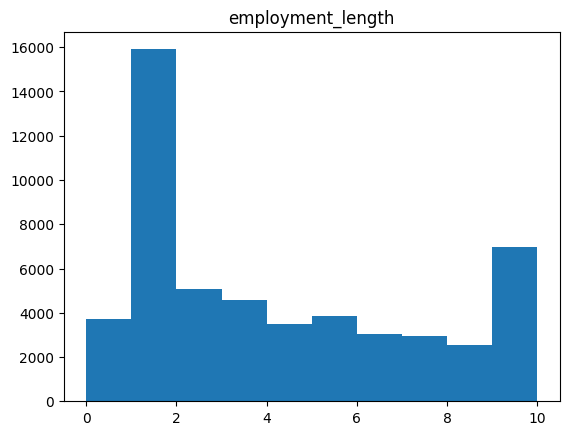

       int_rate
0          7.49
1          6.99
2          7.49
3         14.31
4          6.03
...         ...
54226      9.01
54227     10.59
54228      7.43
54229      7.43
54230     11.54

[54231 rows x 1 columns]


In [34]:
# First get the distribution 
plotter.plot_histogram(df['employment_length'], 'employment_length')
print(df[['int_rate']])

In [35]:
# D’Agostino’s K^2 Test for testing normal distribution
stat, p = normaltest(df['employment_length'], nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=10646.665, p=0.000


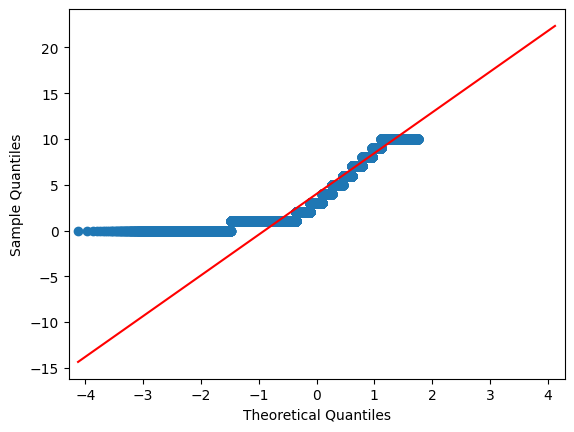

In [36]:
# Plot qqplot
plotter.plot_qq(df['employment_length'])

# employment_length

### Decision:
    Impute with knn (k-nearest neighbours)

### Why:
    shows two different peaks, suggesting no normal distribution

In [37]:
# Implement imputations 
df = dataframe_transformer.knn_imputer(df,'employment_length')

In [38]:
df_info = DataFrameInfo(df)

In [39]:
df_info = DataFrameInfo(df)
null_info = df_info.get_null_counts().T['employment_length']
print(null_info, '\n')

number of nulls              0.0
percentage of nulls          0.0
percentage of non-nulls    100.0
Name: employment_length, dtype: float64 



In [40]:
df_info.get_only_columns_with_nulls()

,number of nulls,percentage of nulls,percentage of non-nulls
mths_since_last_delinq,31002,57.17,42.83
mths_since_last_record,48050,88.60,11.40
next_payment_date,32608,60.13,39.87
mths_since_last_major_derog,46732,86.17,13.83


# rest of the columns

## Decision: 
    Drop columns

## Reason:
    Over 50% of values are null

In [41]:
df = df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_payment_date','mths_since_last_major_derog'])

In [42]:
df_info = DataFrameInfo(df)

In [43]:
df_info.get_only_columns_with_nulls()

,number of nulls,percentage of nulls,percentage of non-nulls


In [44]:
df.to_csv('cleaned_loan_payments.csv')